<a href="https://colab.research.google.com/github/kleeresearch/TextAnalysis/blob/master/Course/Day4/16_docs_clustering_Hier_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

아래와 같이 텍스트 파일을 읽어 옵니다.

전처리를 통해 문서로 표현. 군집화 분석.

워닝

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from os import listdir
from os.path import isfile, join

mypath = '/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day4/python_code/example_En_docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

total_docs = []
onlyfiles.sort()
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [ ]:
len(total_docs)

15

In [ ]:
total_docs[0]

'Ryen Aleman was engrossed in the virtual world, focused on the video game in front of him, when he realized the gunshots he was hearing were real. He ducked and bolted for a restroom to take cover.\nAnother mass shooting was unfolding in Florida, this time at a tournament for competitive players of the football video game, Madden, in Jacksonville. The winners would go on to a higher level tournament in Las Vegas in October, where large cash prizes could be won.\nParticipants had gathered at the Jacksonville Landing Complex, an open-air marketplace with stores, bars and restaurants along the St. Johns River.\n\nDavid Katz, a 24-year-old gamer from Baltimore, Maryland, was in Jacksonville for the tournament at GLHF Game Bar, in the back of a pizza restaurant. On Sunday, he brought a gun into the venue and opened fire, killing two people. Then he turned the gun on himself, Jacksonville Sheriff Mike Williams said. Police have not released a possible motive.\nKatz used at least one handgun

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

def do_En_preprocessing(text, customized_stopwords):
    cleaned_content = re.sub(r'[^\w\d\s]','',text) # To remove symbols
    cleaned_content = cleaned_content.lower() # Case conversion, upper -> lower
    word_tokens = nltk.word_tokenize(cleaned_content) # Tokenization
    tokens_pos = nltk.pos_tag(word_tokens) # POS tagging
    NN_words = []   # To select nouns
    for word, pos in tokens_pos:
        if 'NN' in pos:
            NN_words.append(word)

    wlem = nltk.WordNetLemmatizer()   # Lemmatization
    lemmatized_words = []
    for word in NN_words:
        lemmatized_words.append(wlem.lemmatize(word))
    # 불용어 제거
    stopwords_list = stopwords.words('english')
    unique_NN_words = set(lemmatized_words)
    final_NN_words = lemmatized_words
    for word in unique_NN_words:
        if word in stopwords_list:
            while word in final_NN_words:
                final_NN_words.remove(word)

    unique_NN_words1 = set(final_NN_words)
    for word in unique_NN_words1:
        if word in customized_stopwords:
            while word in final_NN_words:
                final_NN_words.remove(word)

    return final_NN_words

In [ ]:
customized_stopwords = ['be', 'today', 'yesterday', 'new', 'york', 'time'] # 불용어 사전 생성하기

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
docs_nouns = [do_En_preprocessing(doc, customized_stopwords) for doc in total_docs]

텍스트 데이터가 리스트 데이터로 표현되어야 한다. 하나의 문자열이어야 한다.

하나의 문자열 데이터로 나타나야 한다.

join function을 이용해서 vecotrization 을 쓰면 된다.

In [ ]:
print(docs_nouns[0]) # 첫번째 문서에 대한 내용 ((문서 내용, [명사단어])로 구성)

['aleman', 'world', 'video', 'game', 'front', 'gunshot', 'restroom', 'cover', 'mass', 'shooting', 'florida', 'tournament', 'player', 'football', 'video', 'game', 'madden', 'jacksonville', 'winner', 'level', 'tournament', 'vega', 'october', 'cash', 'prize', 'participant', 'jacksonville', 'marketplace', 'store', 'bar', 'restaurant', 'st', 'john', 'river', 'david', 'gamer', 'baltimore', 'maryland', 'jacksonville', 'tournament', 'game', 'bar', 'back', 'pizza', 'restaurant', 'sunday', 'gun', 'venue', 'fire', 'people', 'gun', 'mike', 'williams', 'police', 'motive', 'katz', 'handgun', 'sheriff', 'people', 'wound', 'people', 'area', 'williams', 'victim', 'condition', 'hospital', 'sheriff', 'horror', 'stream', 'event', 'game', 'shot', 'people', 'person', 'f', 'whatd', 'call', 'williams', 'officer', 'scene', 'minute', 'bathroom', 'minute', 'ran', 'scene', 'im', 'member', 'jacksonville', 'fire', 'station', 'rock', 'training', 'parking', 'garage', 'street', 'landing', 'dozen', 'people', 'president

In [ ]:
documents_filtered = [' '.join(doc) for doc in docs_nouns] # list of docs, doc 은 단어들로 구성이 된 string data
# 불필요한 단어들을 제거하고 난후 DTM로 변환하기 위해 다시 list of strings의 형태로 변환

In [ ]:
DOCS_NUM=len(docs_nouns)

In [ ]:
DOCS_NUM

15

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [ ]:
tf_vectorizer = CountVectorizer()
DTM_tf = tf_vectorizer.fit_transform(documents_filtered)
DTM_TF = np.array(DTM_tf.todense())

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
DTM_tfidf = tfidf_vectorizer.fit_transform(documents_filtered)
DTM_TFIDF = np.array(DTM_tfidf.todense())

# 위계적 군집 분석

agglomerative 방법론이 일반적으로 사용되는 방법.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster_idf = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=5)

fit function을 이용. TF 정보를 담고 있는 DTM을 입력하여 군집화 정보

In [ ]:
clusters_hc = cluster_idf.fit(DTM_TF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
clusters_hc.labels_

array([2, 2, 2, 4, 4, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3])

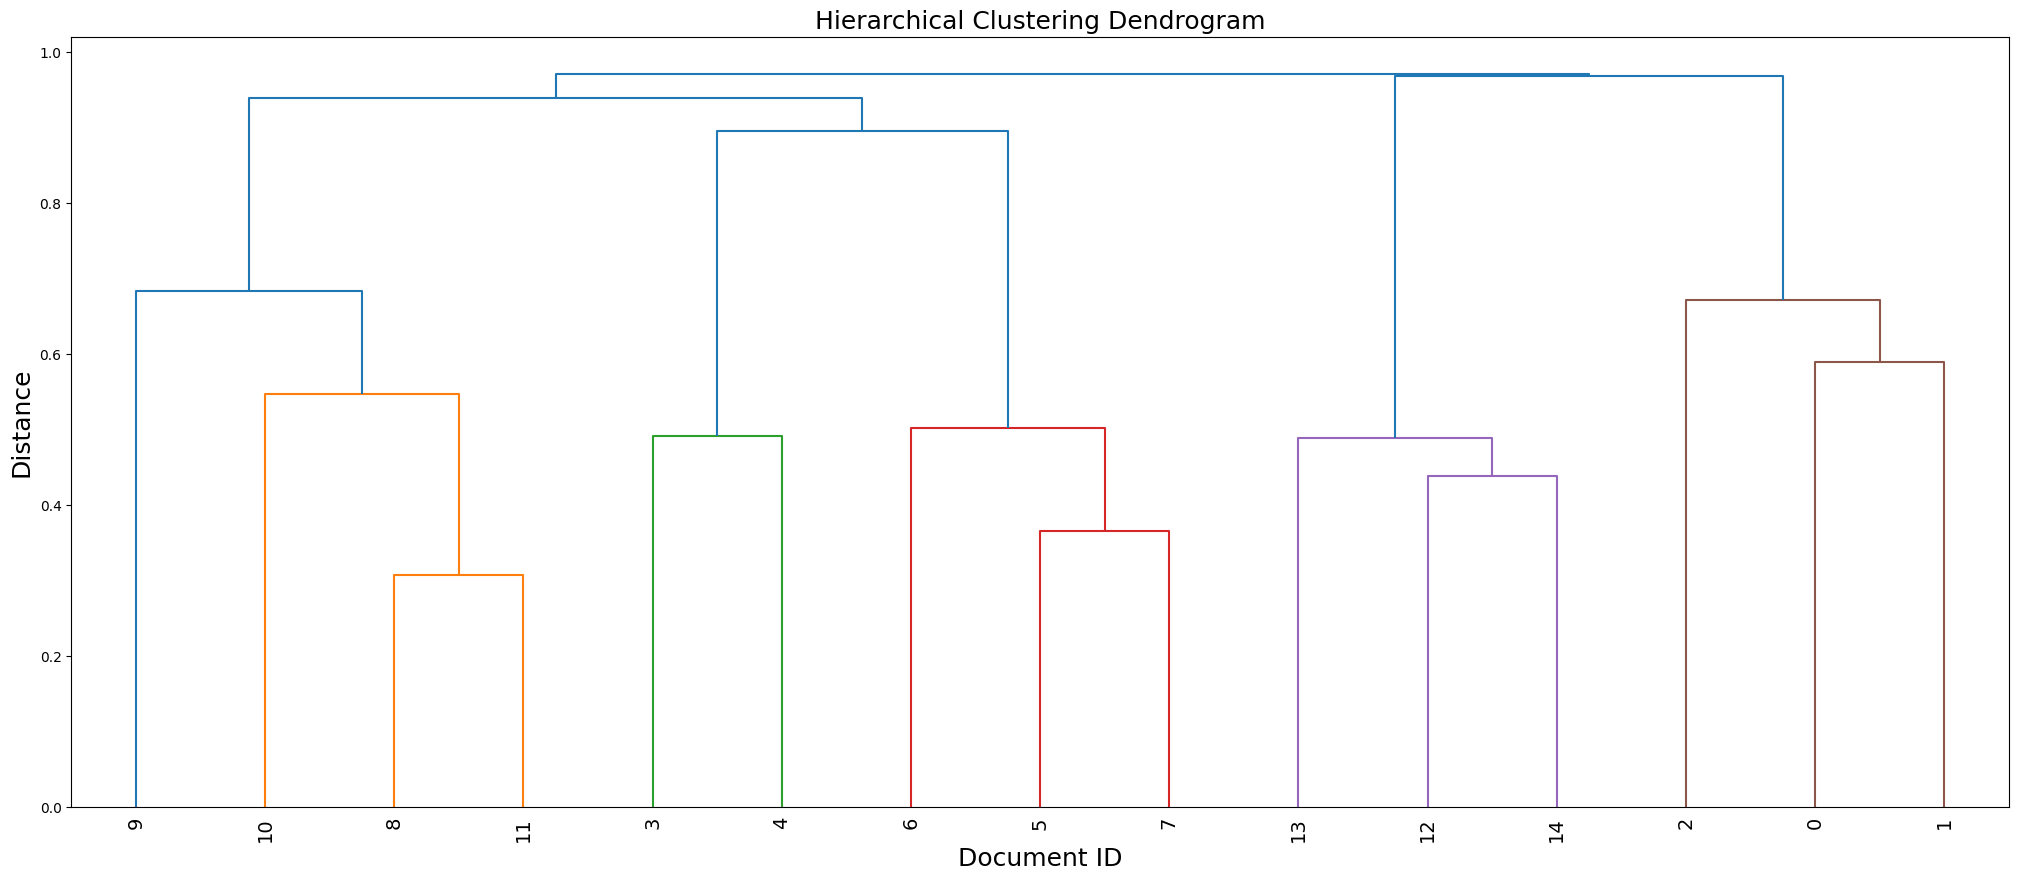

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
Z = linkage(DTM_TFIDF, 'average', metric='cosine')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Document ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()

질의응답
* 네트워크 분석 후 군집화하는 방법(모듈성)이 있을까요?
- 본 강의에는 포함되어 있지 않지만
- unicet으로 네트워크 분석, 플랏한 다음에 별도로 산식하는 알고리즘이 있음.
- 의미연결망의 군집분석을 통해 CONCUR 분석 가능